# 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비

In [2]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [8]:
# Species열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 바꾸기
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [15]:
fish_target = fish["Species"].to_numpy()
fish_target

# fish[["Specied"]]와 같이 두개의 괄호사용이 아님, 이렇게 하면 2차원 배열이 됨

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [16]:
# 훈련 테스트세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [17]:
# 훈련 세트와 테스트 세트를 표준화 전처리하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [27]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [28]:
print(kn.classes_)

#print(pd.unique(fish["Species"]))와 순서가 다르다. 알파벳순서로 정렬이 됐기 때문이다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
# 테스트 세트에 있는 처음 5개 샘플의 타깃값을 예측하기
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [31]:
# 테스트 세트에 있는 처름 5개의 샘플에 대한 확률 출력하기
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

# predict_proba() 메서드의 출력 순서는 앞서 보았던 classes_속성과 같다. 즉 첫번째 열은 "Bream", 두번째 열은 "Parkki"에 대한 확률이다
# 왼쪽 첫번째줄 1열, 그 오른쪽은 2열 ... 이런식임 ㅇㅇ

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [34]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인
# 네 번째 샘플의 최근접 이웃의 클래스를 확인해보자
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

# 이 샘플의 이웃은 다섯 번째 클래스인 "Roach"가 1개이고 세번째 클래스인 "Perch"가 2개이다.
# 따라서 다섯번째 클래스에 대한 확률은 1/3, 세번째 클래스에 대한 확률은 2/3이다. 

[['Roach' 'Perch' 'Perch']]


### 로지스틱 회귀

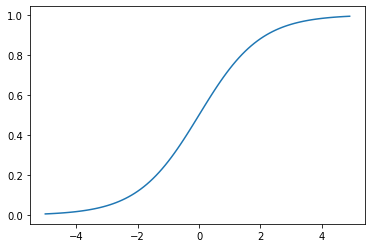

In [35]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

# 시그모이드 함수의 출력은 정말 0~1까지다. 

#### 로지스틱 회귀로 이진 분류 수행하기
시그모이드 함수의 출력이 0.5보다 크면 양성, 작으면 음성 클래스로 판단한다.

In [36]:
char_arr = np.array(["A", "B", "C", "D", "E"])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [40]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]


In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [48]:
print(lr.predict(train_bream_smelt[:5]))
print(kn.predict(train_bream_smelt[:5]))

# 예측 확률알아보기
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)
# 샘플마다 2개의 확률 출력, 첫번째 열이 음성클래스(0)에 대한 확률, 두번째 열이 양성 클래스(1)에 대한 확률
# 빙어가 양성 클래스. predict_proba() 메서드가 반환한 배열 값을 보면 두번째 샘플만 양성 클래스인
# 빙어의 확률이 높습니다. 나머지는 모두 도미(Bream)으로 예측하겠네요.

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [49]:
# 로지스틱 회귀로 성공적인 이진 분류를 수행했다. 그럼 선형회귀에서 처럼 로지스틱 회귀가 학습한 계수를 확인해보자
print(lr.coef_, lr.intercept_)

# 각 값은 방정식의 a,b,c,d의 계수값이다. 

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [50]:
# 이제 z값을 출력해보자
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [51]:
# decisions배열의 값을 확률로 변환해 보죠
from scipy.special import expit
print(expit(decisions))
# print(lr.predict_proba(train_bream_smelt[:5])) 메서드 출력의 두번째 열의 값과 동일합니다.
# 즉, decision_function()메서드는 양성 클래스에 대한 z값을 반환합니다.

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


#### 로지스틱 회귀로 다중 분류 수행하기

In [53]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 훈련 세트와 테스트 세트에 대한 점수가 높고 과대적합이나 과소적합으로 치우친것도 없다.


0.9327731092436975
0.925


In [55]:
# 테스트세트 처음 5개 샘플에 대한 예측출력
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [57]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해 보겠습니다.
# 소수 네번째 자리에서 반올림
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 5개 샘플에 대한 예측이므로 5개의 행이 출력되었다. 
# 또 7개 생선에 대한 확률을 계산했으므로 7개의 열이 출력되었습니다.
# 이진 분류일 경우에는 2개의 열만 있었다는것을 기억해라
# 첫번째 샘플을 보면 세번째 열의 확률이 가장 높습니다. 84.1%나 되네요. 세번째 열이 농어에대한 확률일까요?

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [59]:
print(lr.classes_)
# 네 맞군요, 첫번째 샘플(첫번째 행)은 농어를 가장 높은 확률로 예측했습니다.
# 어렵지 않네요 이중분류는 샘플마다 2개의 확률을 출력, 다중분류는 샘플마다 클래스 개수만큼 확률을 출력(여기선 7개) 이중 가장 높은 확률이 예측클래스가 된다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [62]:
# 다중 분류일 경우 선형 방정식은 어떤 모습인지
print(lr.coef_.shape, lr.intercept_.shape)

# 이 데이터는 5개의 특성을 사용했으므로 coef 배열의 열은 5개입니다. 하지만 행이 7개군요,
# intercept_도 7개나 있습니다. 이말은 이진 분류에서 보았던 z를 7개나 계산한다는 의미이다. 
# 다중분류는 클래스마다 z를 하나씩 계싼한다. 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.
# 그럼 확률은 어떻게 계산할까? 이진 분류에서는 시그모이드 함수를 사용해 z를 0~1사이의 값으로 반환했다. 다중 분류에서는 이와달리
# 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환합니다.

(7, 5) (7,)


In [64]:
# decision_function()메서드로 z1~z7까지의 값을 구한다음 소프트맥스 함수를 사용해 확률로 바꾸어 보겠습니다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [65]:
# scipy.special 아래에 softmax()함수를 임포트해 사용하겠다.
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))

# 앞서 구한 decision배열을 softmax()함수에 전달했다.
# 앞서구한 proba배열과 완전 일치 따라서 성공
# 혼공머신은 로지스틱 회귀를 사용해 7개의 생선에 대한 확률을 예측하는 모델을 훈련했다. 이런 확률값을 사용자에게 보여줄수있다면 마케팅 팀과 고객 만족팀을 모두 만족시킬것이다.

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
